In [1]:
#!pip install mido
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import mido
from mido import MidiFile

In [3]:
file = MidiFile('data/Midi #8.mid')

In [4]:
message = mido.Message('program_change', program=10)

In [5]:
notes = []
for message in file:
    print(message)
    try:
        notes.append(message.note)
    except AttributeError:
        pass

<meta message set_tempo tempo=468750 time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
<meta message track_name name='Nexus Lead 1' time=0>
note_on channel=0 note=43 velocity=100 time=0
note_on channel=0 note=31 velocity=100 time=0
note_on channel=0 note=67 velocity=100 time=0
note_off channel=0 note=67 velocity=64 time=0.05859375
note_on channel=0 note=67 velocity=100 time=0.64453125
note_off channel=0 note=67 velocity=64 time=0.234375
note_on channel=0 note=69 velocity=100 time=0.3515625
note_off channel=0 note=69 velocity=64 time=0.1171875
note_on channel=0 note=70 velocity=100 time=0.234375
note_off channel=0 note=70 velocity=64 time=0.1171875
note_off channel=0 note=43 velocity=64 time=0.1171875
note_off channel=0 note=31 velocity=64 time=0
note_on channel=0 note=46 velocity=100 time=0.234375
note_on channel=0 note=34 velocity=100 time=0
note_on channel=0 note=67 velocity=100 time=0
note_off channel=0 note=67 v

[43, 31, 67, 67, 67, 67, 69, 69, 70, 70, 43, 31, 46, 34, 67, 67, 67, 67, 69, 69, 70, 70, 46, 34, 36, 48, 67, 67, 67, 67, 67, 67, 67, 67, 69, 69, 70, 70, 69, 69, 36, 48, 50, 38, 67, 67, 67, 67, 70, 70, 69, 69, 70, 70, 69, 69, 67, 67, 50, 38, 43, 31, 67, 67, 67, 67, 69, 69, 70, 70, 43, 31, 46, 34, 67, 67, 67, 67, 69, 69, 70, 70, 46, 34, 41, 53, 67, 67, 67, 67, 67, 67, 67, 67, 69, 69, 70, 70, 69, 69, 41, 53, 67, 50, 38, 67, 67, 67, 50, 38, 53, 41, 70, 70, 69, 69, 70, 70, 69, 69, 67, 67, 53, 41]


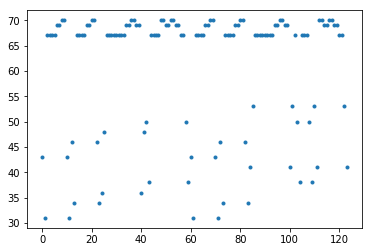

In [6]:
print (notes)
plt.plot(notes,'.')

In [7]:
import keras

/Users/yizhouhe/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
from keras.layers import LSTM, Dense, Dropout, Activation

In [9]:
sequence_length=20
sample_dim=1
pitchnames = sorted(set(item for item in notes))
# create a dictionary to map pitches to integers
note_to_int = dict((note, number) for number, note in enumerate(pitchnames))
network_input = []
network_output = []
# create input sequences and the corresponding outputs
for i in range(0, len(notes) - sequence_length, 1):
    sequence_in = notes[i:i + sequence_length]
    sequence_out = notes[i + sequence_length]

    network_input.append([note_to_int[char] for char in sequence_in])
    network_output.append(note_to_int[sequence_out])
n_patterns = len(network_input)
# reshape the input into a format compatible with LSTM layers
network_input = numpy.reshape(network_input, (n_patterns, sequence_length, sample_dim))
# normalize input
# network_input = network_input / float(n_vocab)
network_output = keras.utils.to_categorical(network_output)
n_catalogue=network_output.shape[1]
print (n_catalogue)
print (note_to_int)

13
{31: 0, 34: 1, 36: 2, 38: 3, 41: 4, 43: 5, 46: 6, 48: 7, 50: 8, 53: 9, 67: 10, 69: 11, 70: 12}


In [10]:
model = keras.Sequential()
model.add(keras.layers.LSTM(64,return_sequences=True,
        input_shape=(sequence_length,sample_dim)
    ))
#model.add(Dropout(0.3))
#model.add(LSTM(6, return_sequences=True))
#model.add(Dropout(0.3))
model.add(LSTM(32))
#model.add(Dense(32))
#model.add(Dropout(0.3))
model.add(Dense(n_catalogue))
model.add(Activation('softmax'))

In [28]:
model.compile(loss=func, optimizer='rmsprop')

In [29]:
model.fit(network_input, network_output, epochs=200)

Epoch 1/200
104/104 [==============================] - 1s 9ms/step - loss: 0.0442
Epoch 2/200
104/104 [==============================] - 0s 1ms/step - loss: 0.0348
Epoch 3/200
104/104 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 4/200
104/104 [==============================] - 0s 1ms/step - loss: 0.0318
Epoch 5/200
104/104 [==============================] - 0s 1ms/step - loss: 0.0286
Epoch 6/200
104/104 [==============================] - 0s 1ms/step - loss: 0.0293
Epoch 7/200
104/104 [==============================] - 0s 1ms/step - loss: 0.0302
Epoch 8/200
104/104 [==============================] - 0s 1ms/step - loss: 0.0288
Epoch 9/200
104/104 [==============================] - 0s 1ms/step - loss: 0.0250
Epoch 10/200
104/104 [==============================] - 0s 1ms/step - loss: 0.0276
Epoch 11/200
104/104 [==============================] - 0s 1ms/step - loss: 0.0288
Epoch 12/200
104/104 [==============================] - 0s 1ms/step - loss: 0.0271A: 0s - loss: 

104/104 [==============================] - 0s 1ms/step - loss: 0.0173
Epoch 100/200
104/104 [==============================] - 0s 901us/step - loss: 0.0159
Epoch 101/200
104/104 [==============================] - 0s 938us/step - loss: 0.0179
Epoch 102/200
104/104 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 103/200
104/104 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 104/200
104/104 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 105/200
104/104 [==============================] - 0s 1ms/step - loss: 0.0177
Epoch 106/200
104/104 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 107/200
104/104 [==============================] - 0s 1ms/step - loss: 0.0182
Epoch 108/200
104/104 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 109/200
104/104 [==============================] - 0s 1ms/step - loss: 0.0133
Epoch 110/200
104/104 [==============================] - 0s 1000us/step - loss: 0.0125

104/104 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 197/200
104/104 [==============================] - 0s 984us/step - loss: 0.0065
Epoch 198/200
104/104 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 199/200
104/104 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 200/200
104/104 [==============================] - 0s 1ms/step - loss: 0.0083


In [30]:
prediction=model.predict(network_input, verbose=0)

In [31]:
for note in prediction:
    print (note)

[1.6486844e-03 8.2479592e-04 7.0140988e-04 1.2635736e-04 2.7145253e-04
 4.8817890e-03 8.8606710e-03 5.5751852e-06 9.3333183e-05 5.2397529e-04
 1.9264838e-02 1.0516467e-01 8.5763252e-01]
[1.6683193e-03 1.3606488e-03 3.5062424e-04 8.9658293e-05 2.0755382e-04
 4.7669187e-03 3.4050528e-02 5.9637846e-06 5.5781114e-05 3.9472303e-04
 3.2752696e-03 6.9606449e-03 9.4681334e-01]
[3.3136278e-02 4.3489803e-02 5.5044331e-03 2.6066968e-04 1.6039779e-03
 2.9682403e-02 6.8275732e-01 2.2366774e-04 1.3537701e-04 4.1293763e-03
 1.8477737e-03 3.1085320e-02 1.6614361e-01]
[1.34251535e-01 5.94939888e-01 2.72108037e-02 4.53719840e-04
 1.32162115e-02 1.50767174e-02 1.05048895e-01 3.54128587e-03
 4.87949932e-04 1.34009644e-02 5.39937289e-03 6.77700564e-02
 1.92026459e-02]
[0.02522651 0.12303673 0.3057986  0.00250744 0.3069208  0.00855204
 0.02848469 0.07661437 0.00949752 0.04370079 0.00749384 0.04696496
 0.01520178]
[0.00878901 0.1373979  0.08024365 0.01186139 0.09354877 0.004343
 0.03182508 0.35352978 0.01822

In [32]:
output_note=[list(note_to_int.keys())[arg] for arg in np.argmax(prediction, axis=1)]

In [33]:
print (output_note)

[70, 70, 46, 34, 41, 48, 67, 67, 67, 67, 67, 67, 67, 67, 69, 69, 70, 70, 69, 69, 36, 48, 43, 67, 67, 67, 67, 67, 70, 69, 69, 69, 70, 70, 69, 69, 67, 67, 50, 43, 43, 31, 67, 67, 67, 67, 69, 69, 70, 70, 46, 31, 46, 34, 67, 67, 67, 67, 69, 69, 70, 70, 46, 34, 41, 48, 67, 67, 67, 67, 67, 67, 67, 67, 69, 69, 70, 70, 69, 69, 36, 53, 43, 67, 38, 67, 67, 67, 38, 38, 41, 41, 70, 70, 69, 69, 70, 70, 69, 69, 67, 67, 53, 41]


In [34]:
print (notes)

[70, 70, 46, 34, 36, 48, 67, 67, 67, 67, 67, 67, 67, 67, 69, 69, 70, 70, 69, 69, 36, 48, 50, 38, 67, 67, 67, 67, 70, 70, 69, 69, 70, 70, 69, 69, 67, 67, 50, 38, 43, 31, 67, 67, 67, 67, 69, 69, 70, 70, 43, 31, 46, 34, 67, 67, 67, 67, 69, 69, 70, 70, 46, 34, 41, 53, 67, 67, 67, 67, 67, 67, 67, 67, 69, 69, 70, 70, 69, 69, 41, 53, 67, 50, 38, 67, 67, 67, 50, 38, 53, 41, 70, 70, 69, 69, 70, 70, 69, 69, 67, 67, 53, 41]


In [35]:
print (np.sum(np.array([1 for x,y in zip(output_note,notes) if x==y]))/len(output_note))

0.8846153846153846


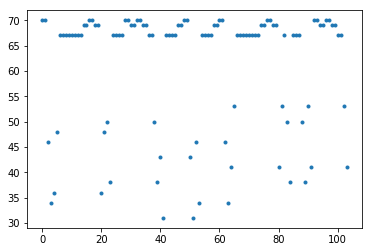

In [36]:
plt.plot(notes,'.')

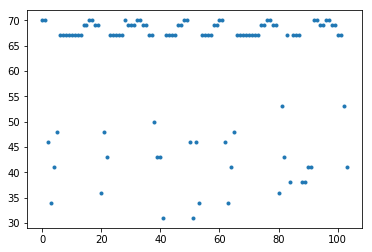

In [37]:
plt.plot(output_note,'.')

In [38]:
notes = notes[20:]

In [39]:
notes

[36,
 48,
 50,
 38,
 67,
 67,
 67,
 67,
 70,
 70,
 69,
 69,
 70,
 70,
 69,
 69,
 67,
 67,
 50,
 38,
 43,
 31,
 67,
 67,
 67,
 67,
 69,
 69,
 70,
 70,
 43,
 31,
 46,
 34,
 67,
 67,
 67,
 67,
 69,
 69,
 70,
 70,
 46,
 34,
 41,
 53,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 69,
 69,
 70,
 70,
 69,
 69,
 41,
 53,
 67,
 50,
 38,
 67,
 67,
 67,
 50,
 38,
 53,
 41,
 70,
 70,
 69,
 69,
 70,
 70,
 69,
 69,
 67,
 67,
 53,
 41]

In [41]:
zip(notes,output_note)

In [25]:
len(notes)

104

In [27]:
def func(y_true,y_pred):
    return np.dot(y_true-y_pred,y_true-y_pred)